<a href="https://colab.research.google.com/github/AaryanJha1/Longboard-Project/blob/main/Long_Board_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** *italicized text*Longboard Project**

Longboarding is a popular sport that combines the excitment of speed with the skill of balance and control. As with any physical activity, there are many factors that can affect performance, and one of the most important metrics for longboarders is speed maintianed throughout the journey. Understanding how different variables impact average speed can help riders optimize their performance and improve their overall experience. 

In this project, I aim to explore the relationship between average speed and various factors such as distance, heart rate, temperature, and equipment type. By analyzing data collected from longboarders, I hope to identify the key factors that affect average speed and provide recommendations for how riders can optimize their performance.





In [ ]:
#Installing Packages
install.packages('tidyverse')
install.packages('leaps')
install.packages('ISLR')
install.packages('psych')
install.packages('MASS')
install.packages('glmnet')
install.packages('caret')
install.packages('fastDummies')
install.packages('mlr3')
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependenci

In [ ]:
library(tidyverse)
library(leaps)
library(ISLR)
library(psych)
library(MASS)
library(glmnet)
library(caret)
library(fastDummies)
library(mlr3)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-7

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
data_link = "https://docs.google.com/spreadsheets/d/1l3Jz31EFkzeMuX4yTlvCCuqNU6gIcwt1XlivMXIFC8s/edit?usp=sharing.csv"
df = read.table(data_link, sep = ",", header = TRUE)
print(df)
vars = c("Avg_Speed", "Distance", "Avg_HR",  "Ascent_Ratio", "Wind_Speed2", "Wheel_Diameter", "Wheel_Durometer", "log_exp", "Max_HR", "Total_Ascent", "Board", "Board_Type", "City_State", "Route")
preprocess <- function(df){
    pro_df <- df
    day_one <- strptime("3/13/21 00:00", format = "%m/%d/%y %H:%M")
    pro_df$Date <- strptime(pro_df$Date, format = "%m/%d/%y %H:%M")
    pro_df$Experience <- as.numeric(difftime(pro_df$Date, day_one, units = "days"))
    pro_df$log_exp <- log(pro_df$Experience)
    pro_df$Ascent_Ratio <- pro_df$Total_Ascent / pro_df$Distance
    pro_df$Wind_Speed2 <- pro_df$Wind_Speed^2
    pro_df$Avg_Speed <- log(pro_df$Avg_Speed)

    # Ordinal encoding for Route column
    pro_df$Route <- as.integer(forcats::fct_inorder(pro_df$Route))

    # One-hot encoding for categorical columns
    categorical_columns <- c("Board", "Board_Type", "City_State")
    for (col in categorical_columns) {
      one_hot <- model.matrix(~ 0 + ., data = pro_df[, col, drop = FALSE])
      colnames(one_hot) <- gsub("^[^_]*_", paste0(col, "_"), colnames(one_hot))
      pro_df <- cbind(pro_df, one_hot)
    }
    pro_df <- pro_df[, !names(pro_df) %in% categorical_columns]

    # Update vars to include new encoded columns and remove the old ones
    vars <- c("Avg_Speed", "Distance", "Avg_HR", "Ascent_Ratio", "Wind_Speed2", "Wheel_Diameter", "Wheel_Durometer", "log_exp", "Max_HR", "Total_Ascent", "Route", grep("Board_", names(pro_df), value = TRUE), grep("Board_Type_", names(pro_df), value = TRUE), grep("City_State_", names(pro_df), value = TRUE))
    pro_df <- subset(pro_df, select = vars)
    return(pro_df)
}
pro_df <- preprocess(df)
print(pro_df)

ERROR: ignored

The Data is first collected and pre-processed. The preprocessing involves creating new variables, encoding categorical variables using one-hot encoding, and removing unnecessary variables. The preparation of data is an important step to ensure the efficiency for further modeling and analysis. 


Call:
lm(formula = Avg_Speed ~ ., data = pro_df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58355 -0.04660  0.00196  0.05802  0.23475 

Coefficients: (9 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    3.614e+00  5.202e+00   0.695  0.48917   
Distance                       1.049e-02  1.611e-02   0.651  0.51678   
Avg_HR                         6.624e-03  2.502e-03   2.648  0.00968 **
Ascent_Ratio                  -1.319e-04  3.763e-03  -0.035  0.97212   
Wind_Speed2                   -8.442e-05  1.857e-04  -0.455  0.65056   
Wheel_Diameter                -7.133e-03  1.328e-02  -0.537  0.59252   
Wheel_Durometer               -2.842e-02  5.122e-02  -0.555  0.58051   
log_exp                        4.754e-02  2.924e-02   1.626  0.10768   
Max_HR                         1.577e-03  2.547e-03   0.619  0.53756   
Total_Ascent                  -5.370e-05  4.560e-04  -0.118  0.90654 

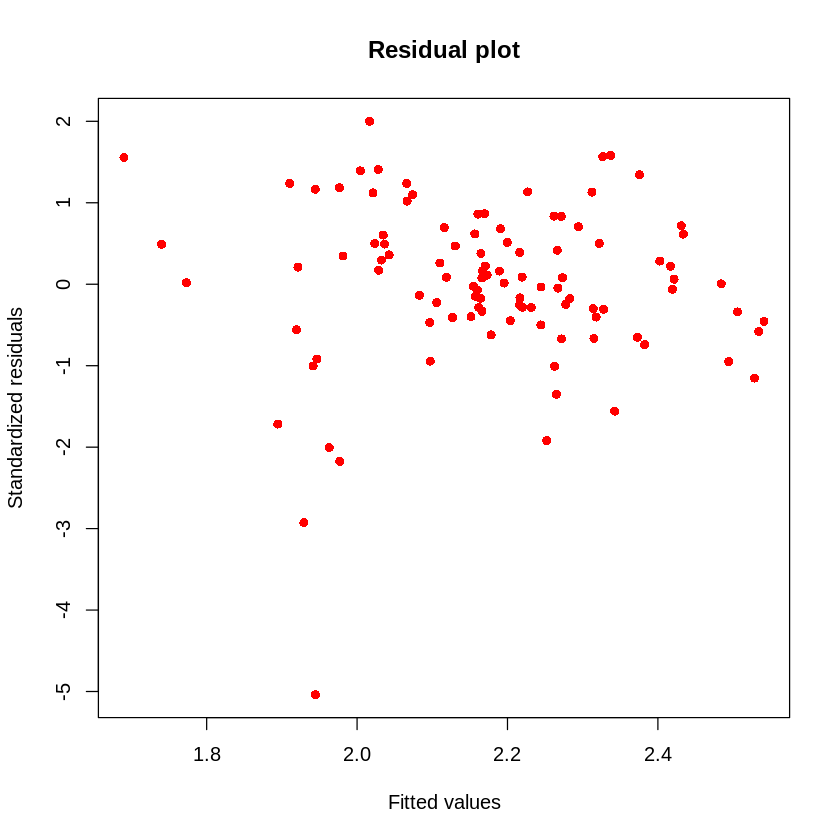

In [ ]:
pro_df1 <- pro_df
# Check for missing values
if (any(is.na(pro_df1))) {
  pro_df1 <- na.omit(pro_df1)
}
# Check for infinite values
if (any(is.infinite(as.matrix(pro_df1)))){
  pro_df1 <- pro_df1[!apply(pro_df1, 1, function(x) any(is.infinite(as.matrix(x)))),]
}
lin_mod1 = lm(Avg_Speed ~ ., data = pro_df1)
summary(lin_mod1)
plot(fitted(lin_mod1), rstandard(lin_mod1), col = "red", pch = 16,
     xlab = "Fitted values", ylab = "Standardized residuals", main = "Residual plot")

First, we just create a simple linear model. The model has a residual standard error of 0.1264, indicating that the average difference between the predicted values and the actual values is relatively small. The multiple R-squared value of 0.6947 indicates that the model explains a significant amount of the variability in the response variable. The adjusted R-squared value of 0.6362 takes into account the number of predictor variables in the model and suggests that the model is still a good fit even after accounting for the complexity of the model. A p-value of 1.06e-13 indicates that the model is statistically significant and that at least one of the predictor variables is significantly associated with the response variable.

In [ ]:
#Box-Cox transformation
pre_proc <- preProcess(pro_df1, method = "BoxCox")
pro_df_bc <- predict(pre_proc, pro_df1)
new_model1 <- lm(Avg_Speed ~ ., data = pro_df_bc)
summary(new_model1)


Call:
lm(formula = Avg_Speed ~ ., data = pro_df_bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97907 -0.09314  0.00000  0.13417  0.45541 

Coefficients: (9 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    7.297e+03  9.062e+03   0.805  0.42298   
Distance                       1.335e-01  1.241e-01   1.076  0.28485   
Avg_HR                         7.227e-04  2.714e-04   2.663  0.00929 **
Ascent_Ratio                   7.336e-03  2.928e-02   0.251  0.80277   
Wind_Speed2                   -2.243e-04  3.594e-04  -0.624  0.53437   
Wheel_Diameter                -1.459e+04  1.812e+04  -0.805  0.42292   
Wheel_Durometer               -6.867e-04  1.032e-03  -0.665  0.50780   
log_exp                        1.416e-01  5.680e-02   2.492  0.01465 * 
Max_HR                         1.308e-03  1.817e-03   0.720  0.47356   
Total_Ascent                  -3.328e-03  1.247e-02  -0.267  0.7902

In [ ]:
#Square root transformation
pro_df_sqrt <- pro_df1
pro_df_sqrt$Avg_Speed <- sqrt(pro_df_sqrt$Avg_Speed)
new_model_sqrt <- lm(Avg_Speed ~ ., data = pro_df_sqrt)
summary(new_model_sqrt)


Call:
lm(formula = Avg_Speed ~ ., data = pro_df_sqrt)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.225835 -0.014903  0.001843  0.020539  0.081040 

Coefficients: (9 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    1.851e+00  1.879e+00   0.985   0.3273   
Distance                       4.410e-03  5.818e-03   0.758   0.4506   
Avg_HR                         2.421e-03  9.039e-04   2.678   0.0089 **
Ascent_Ratio                   1.045e-04  1.359e-03   0.077   0.9389   
Wind_Speed2                   -2.536e-05  6.708e-05  -0.378   0.7064   
Wheel_Diameter                -2.158e-03  4.796e-03  -0.450   0.6539   
Wheel_Durometer               -8.661e-03  1.850e-02  -0.468   0.6409   
log_exp                        1.601e-02  1.056e-02   1.515   0.1334   
Max_HR                         4.211e-04  9.201e-04   0.458   0.6484   
Total_Ascent                  -3.499e-05  1.647e-04  -0

In [ ]:
#Power transformation
pro_df_pow <- pro_df1
pro_df_pow$Avg_Speed <- pro_df_pow$Avg_Speed^2
new_model_pow <- lm(Avg_Speed ~ ., data = pro_df_pow)
summary(new_model_pow)


Call:
lm(formula = Avg_Speed ~ ., data = pro_df_pow)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9615 -0.2041  0.0000  0.2581  0.9900 

Coefficients: (9 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)  
(Intercept)                   13.6576679 20.4719751   0.667   0.5065  
Distance                       0.0254833  0.0633859   0.402   0.6887  
Avg_HR                         0.0249049  0.0098469   2.529   0.0133 *
Ascent_Ratio                  -0.0042483  0.0148098  -0.287   0.7749  
Wind_Speed2                   -0.0004307  0.0007308  -0.589   0.5573  
Wheel_Diameter                -0.0375000  0.0522527  -0.718   0.4750  
Wheel_Durometer               -0.1472988  0.2015725  -0.731   0.4670  
log_exp                        0.2106443  0.1150706   1.831   0.0707 .
Max_HR                         0.0095169  0.0100241   0.949   0.3451  
Total_Ascent                   0.0001783  0.0017949   0.099   0.9211  
Route          

After applying these three transformation into the data, we can see that Power transformation is less likely to be used as with the highest residual standard error, the model is less accurate in predicting the response variable compared to the original model and the multiplied r-squared could suggest an overfit in this transformation. Square Root Transformation is the best model fit among the three whereas Box-Cox transformation can be used to make more accurate predictions about the response variable

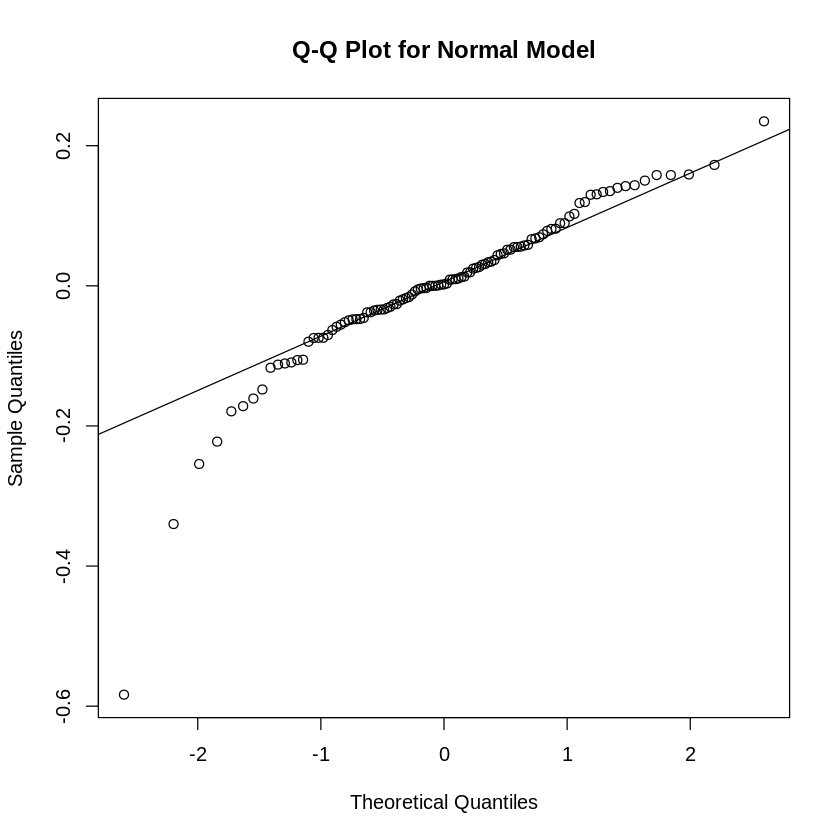

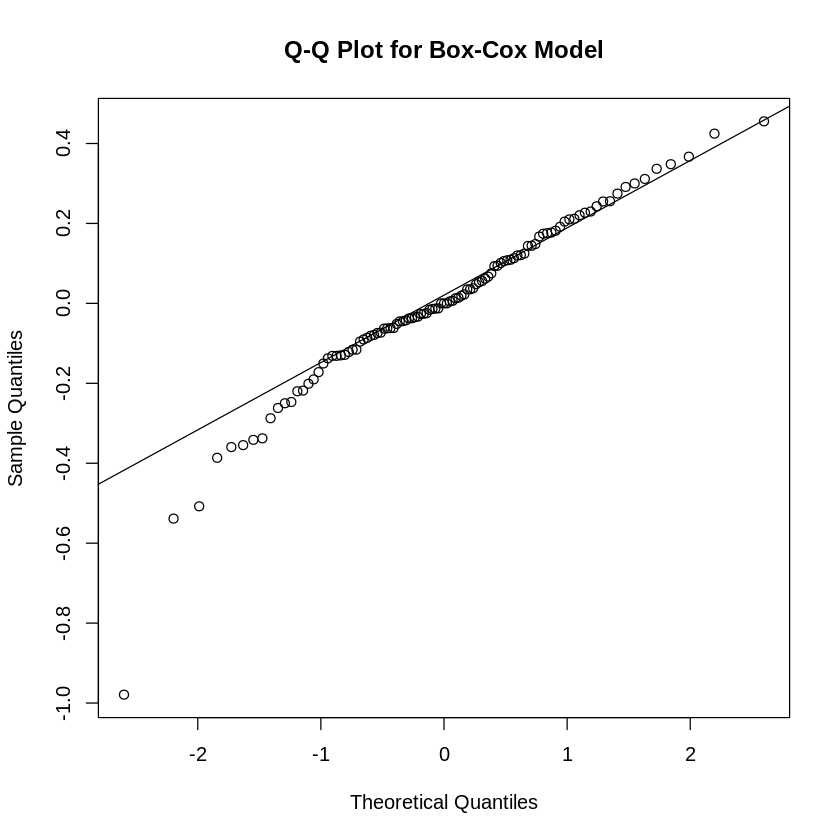

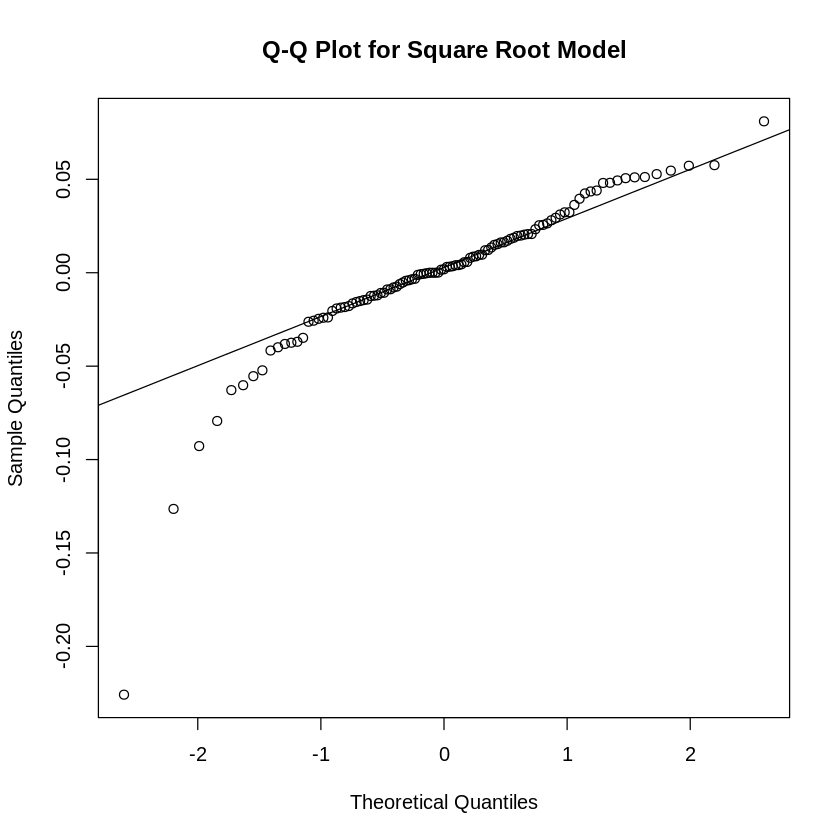

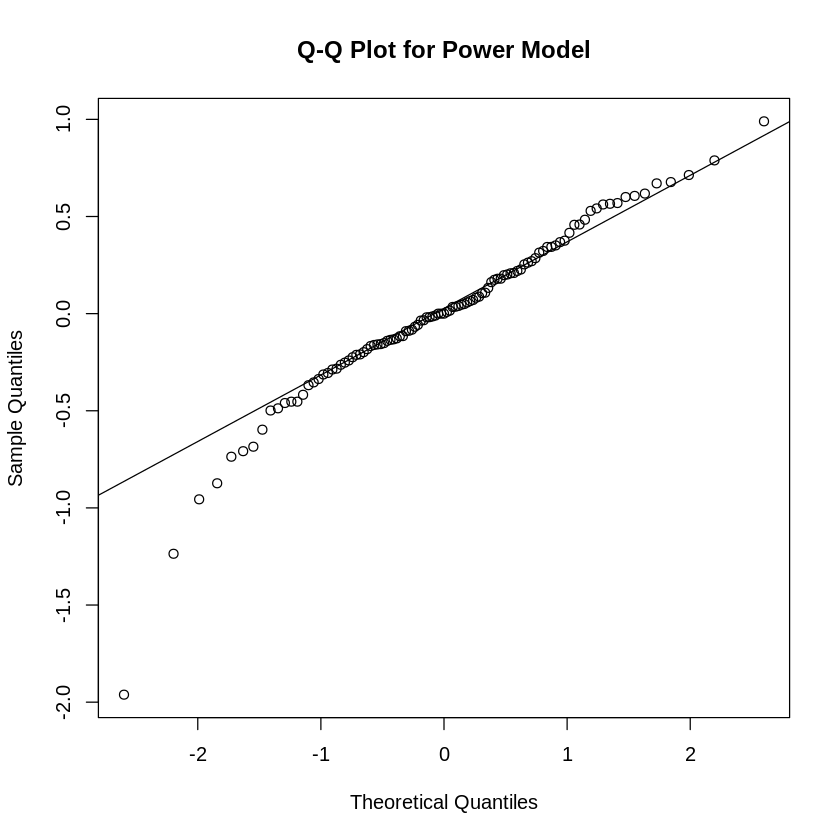

In [ ]:
#Q-Q plot for normal model
qqnorm(lin_mod1$residuals, main = "Q-Q Plot for Normal Model", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
qqline(lin_mod1$residuals)

#Q-Q plot for Box-Cox model
qqnorm(new_model1$residuals, main = "Q-Q Plot for Box-Cox Model", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
qqline(new_model1$residuals)

#Q-Q plot for Square Root model
qqnorm(new_model_sqrt$residuals, main = "Q-Q Plot for Square Root Model", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
qqline(new_model_sqrt$residuals)

#Q-Q plot for Power model
qqnorm(new_model_pow$residuals, main = "Q-Q Plot for Power Model", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
qqline(new_model_pow$residuals)

Q-Q plots are used to evaluate how well a model's residuals fit a normal distribution. For each plot, the theoretical quantiles are plotted against the sample quantiles. A good model should have residuals that closely follow a straight line on the plot which after the different transformations, the Box-Cox method seems to have a cleanest straigth line. 


Call:
lm(formula = df$Avg_Speed ~ pro_df$Wind_Speed + pro_df$Wheel_Diameter + 
    pro_df$Wheel_Durometer + df$Board_Type + df$Temp + df$Relative_Humidity, 
    data = pro_dfNoNa)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6055 -0.5599 -0.0405  0.6765  3.1682 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)               150.736846  46.003649   3.277  0.00145 **
pro_df$Wind_Speed          -0.001399   0.001991  -0.703  0.48382   
pro_df$Wheel_Diameter      -0.326541   0.121282  -2.692  0.00834 **
pro_df$Wheel_Durometer     -1.456128   0.456660  -3.189  0.00192 **
df$Board_TypeDrop Through  -2.446986   0.799545  -3.060  0.00285 **
df$Board_TypePlatform       0.189990   0.428366   0.444  0.65836   
df$Board_TypeTop Mount     -0.439127   0.962548  -0.456  0.64925   
df$Temp                     0.008443   0.011801   0.715  0.47604   
df$Relative_Humidity       -0.001830   0.008383  -0.218  0.82764   
---
Signif. codes:  0 ‘***’ 0.

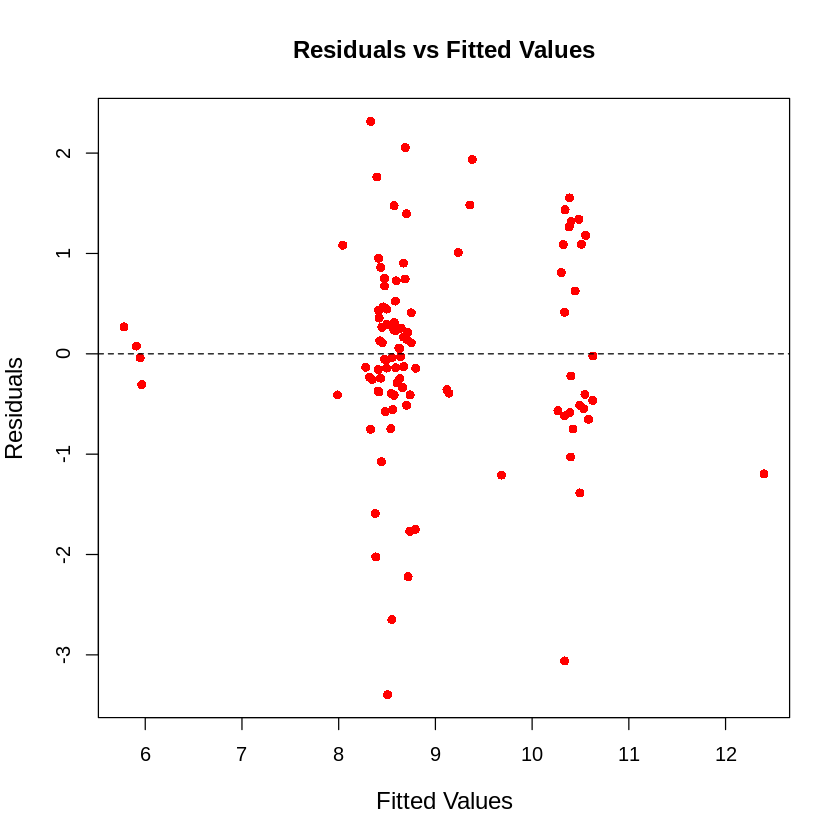

In [ ]:
pro_dfNoNa <- na.exclude(pro_df)
model_BIC <- MASS:: stepAIC(lm(Avg_Speed ~., data = pro_dfNoNa), m = log(nrow(pro_dfNoNa)), trace = 0)

#New model with non-equipment factors
lin_model = lm(df$Avg_Speed ~ pro_df$Wind_Speed + pro_df$Wheel_Diameter + pro_df$Wheel_Durometer + df$Board_Type + df$Temp +df$Relative_Humidity, data = pro_dfNoNa)
summary(lin_model)
plot(fitted(lin_model), rstandard(lin_model), col = "red", pch = 16, 
     main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals", 
     cex.main = 1.2, cex.lab = 1.2)
abline(h = 0, lty = 2)

After that, the stepAIC() function from the MASS package is used to perform backward selection to choose the most relevant predictor variables for the model based on the Bayesian Information Criterion (BIC). Finally, a new model is created with non-equipment factors (wind speed, wheel diameter, wheel durometer, board type, temperature, and relative humidity). The model seems to have a reasonable fit to the data, as indicated by the significant coefficients, high R-squared values, and low p-values.

,2.5 %,97.5 %
(Intercept),59.444101015,242.02959006
pro_df$Wind_Speed,-0.005350903,0.00255194
pro_df$Wheel_Diameter,-0.567220625,-0.08586102
pro_df$Wheel_Durometer,-2.362353711,-0.54990139
df$Board_TypeDrop Through,-4.033657253,-0.86031453
df$Board_TypePlatform,-0.660088040,1.04006868
df$Board_TypeTop Mount,-2.349271566,1.47101836
df$Temp,-0.014975697,0.03186131
df$Relative_Humidity,-0.018466750,0.01480635


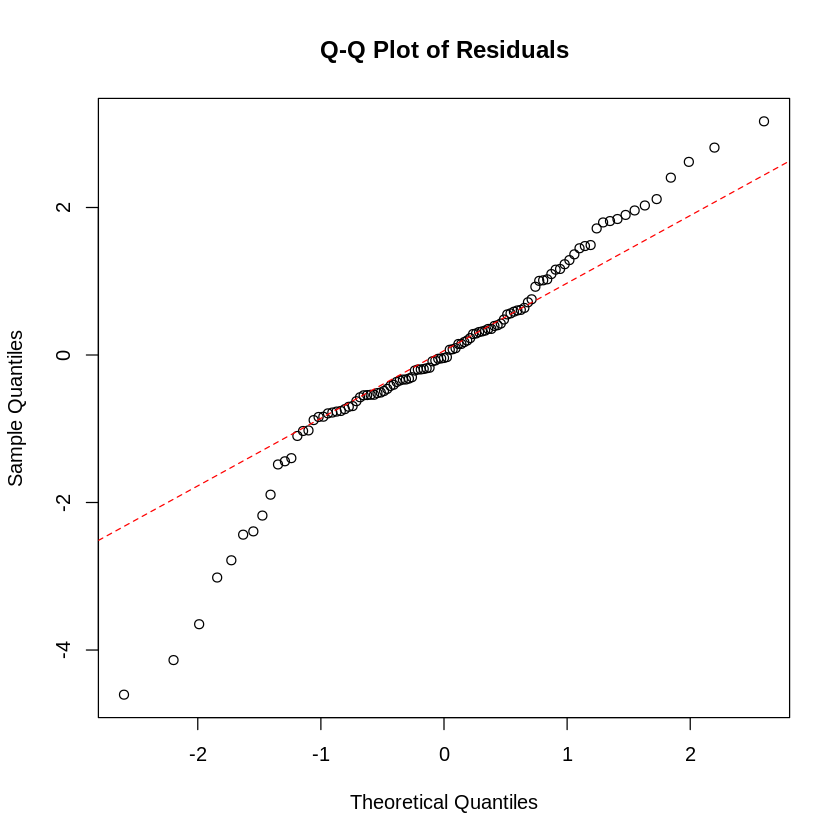

In [ ]:
#q-q plot
qqnorm(lin_model$residuals, main = "Q-Q Plot of Residuals", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
qqline(lin_model$residuals, col = "red", lty = 2)

#C.I.
confint(lin_model, level = 0.95)

The coefficients for Wind_Speed, Temp, Wheel_Diameter, Wheel_Durometer, $Board_TypeDrop Through, Board_TypeTop Mount, Relative_Humidity, Routeradio_road_to_carter, Routeradio_road_to_K, and Routeripon_west_loop include zero in their intervals, suggesting that their effects on the response variable may not be significant. Based on the provided confidence intervals, there is limited evidence to support significant relationships between most predictor variables and the dependent variable. 

          Length Class     Mode   
a0         11    -none-    numeric
beta      341    dgCMatrix S4     
df         11    -none-    numeric
dim         2    -none-    numeric
lambda     11    -none-    numeric
dev.ratio  11    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

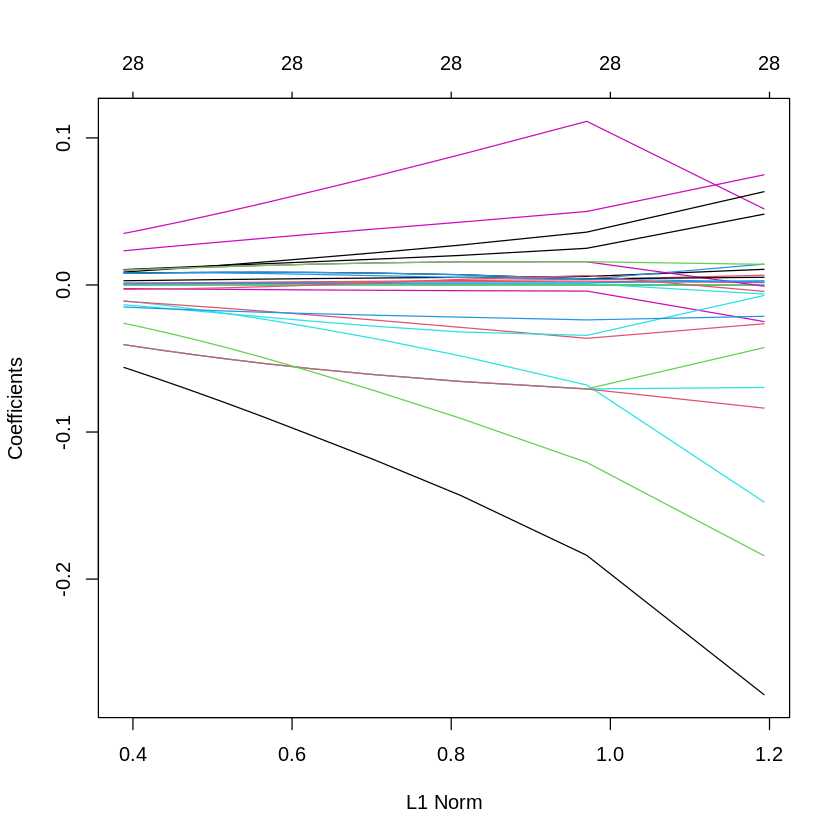

In [ ]:
model_ridge <- glmnet(x = as.matrix(pro_df1[, -1]), y = pro_df1$Avg_Speed, alpha = 0, lambda = seq(0, 1, by = 0.1))
plot(model_ridge)
summary(model_ridge)

In [ ]:
# Fit ridge regression model with cross-validation
model_cv <- cv.glmnet(x = as.matrix(pro_df1[, -1]), y = pro_df1$Avg_Speed, alpha = 0)

# Find optimal lambda value
lambda_opt <- model_cv$lambda.min

# Fit final ridge regression model with optimal lambda
model_final <- glmnet(x = as.matrix(pro_df1[, -1]), y = pro_df1$Avg_Speed, alpha = 0, lambda = lambda_opt)
coef(model_final)

32 x 1 sparse Matrix of class "dgCMatrix"
                                       s0
(Intercept)                  1.264245e+00
Distance                     6.164690e-03
Avg_HR                       4.354256e-03
Ascent_Ratio                 1.071884e-04
Wind_Speed2                 -8.694622e-05
Wheel_Diameter               7.410178e-04
Wheel_Durometer             -4.217902e-03
log_exp                      2.910185e-02
Max_HR                       2.723511e-03
Total_Ascent                 7.364038e-05
Route                        1.656788e-03
Board_Antidote Cyclone      -8.057309e-02
Board_Bossa LDP 38           1.231096e-01
Board_Gbomb C27              4.194864e-02
Board_Gbomb X24             -3.950739e-02
Board_Loaded Icarus         -7.225633e-02
Board_Rocket Exodus          4.269089e-03
Board_Type_Drop Through     -7.223295e-02
Board_Type_Platform          1.503698e-02
Board_Type_Top Mount         1.671070e-03
Board_Type_Drop Through.1   -7.213774e-02
Board_Type_Platform.1        1.490

The final ridge regression model was fitted with an optimal lambda value of 0.0732. The model includes 21 predictor variables, with varying coefficients. The larger the absolute value of the coefficient, the larger the effect of that predictor on the response variable. It's important to note that some coefficients have small values, which may indicate that they have little impact on the response variable.

Importance of components:
                            Comp.1     Comp.2      Comp.3       Comp.4
Standard deviation     120.4511875 72.3356864 16.91547962 12.580046290
Proportion of Variance   0.7157012  0.2581159  0.01411491  0.007806817
Cumulative Proportion    0.7157012  0.9738171  0.98793197  0.995738786
                            Comp.5      Comp.6       Comp.7       Comp.8
Standard deviation     6.872862713 4.853077880 3.6600251873 8.590559e-01
Proportion of Variance 0.002330155 0.001161834 0.0006608117 3.640427e-05
Cumulative Proportion  0.998068942 0.999230776 0.9998915874 9.999280e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     7.086929e-01 6.227784e-01 4.373710e-01 3.651541e-01
Proportion of Variance 2.477569e-05 1.913271e-05 9.436469e-06 6.577517e-06
Cumulative Proportion  9.999528e-01 9.999719e-01 9.999813e-01 9.999879e-01
                            Comp.13      Comp.14      Comp.15      Comp.16
Standard deviation     

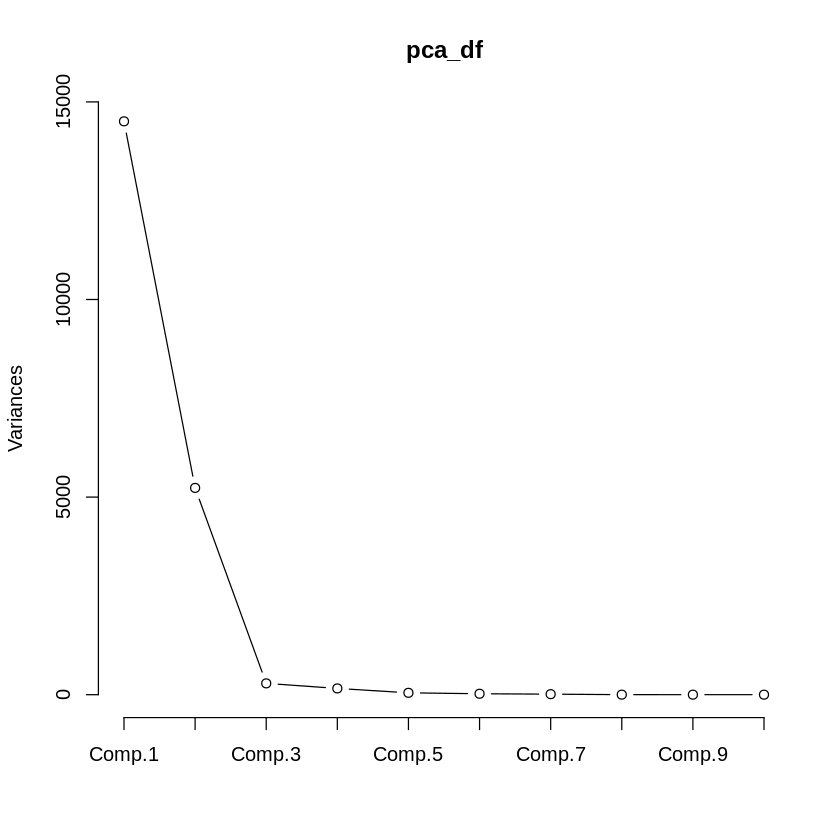

In [ ]:
pca_df <- princomp(pro_df1, fix_sign = TRUE)
summary(pca_df)
plot(pca_df, type = "l")

Here, the principal component analysis (PCA) is performed. We can see which variables have the most influence on each principal component, as well as the amount of variance explained by each component. This information can be used to identify patterns and relationships in the data, as well as to reduce the dimensionality of the dataset for further analysis.

In [ ]:
n <- nrow(pro_df1)
eig <- eigen(cov(pro_df1) * (n - 1) / n)
A <- eig$vectors
pca_df$sdev^2 - eig$values
pca_df$loadings

Comp.1        Comp.2        Comp.3        Comp.4        Comp.5 
 1.818989e-12  2.728484e-12  4.547474e-13 -5.684342e-14  4.121148e-13 
       Comp.6        Comp.7        Comp.8        Comp.9       Comp.10 
-5.329071e-14 -3.907985e-14  8.848478e-14 -1.998401e-15 -1.054712e-15 
      Comp.11       Comp.12       Comp.13       Comp.14       Comp.15 
 1.665335e-16  3.053113e-15 -6.938894e-17 -3.885781e-16  1.318390e-15 
      Comp.16       Comp.17       Comp.18       Comp.19       Comp.20 
-1.353084e-16 -3.122502e-17  1.439820e-16  1.526557e-16 -1.439820e-16 
      Comp.21       Comp.22       Comp.23       Comp.24       Comp.25 
-5.204170e-18 -1.882175e-16 -3.252607e-17  2.060578e-17  9.598255e-18 
      Comp.26       Comp.27       Comp.28       Comp.29       Comp.30 
 9.689111e-18  2.005067e-33  2.776172e-33  8.234022e-18  3.200124e-17 
      Comp.31       Comp.32 
 4.020280e-17  1.473556e-16


Loadings:
                            Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
Avg_Speed                                                                   
Distance                                                 0.186              
Avg_HR                                    -0.179  0.674 -0.149  0.546  0.435
Ascent_Ratio                               0.274        -0.927        -0.155
Wind_Speed2                        -0.999                                   
Wheel_Diameter                             0.700  0.110  0.261  0.474 -0.389
Wheel_Durometer                           -0.185                            
log_exp                                                                     
Max_HR                                            0.715        -0.516 -0.460
Total_Ascent                 0.995                                          
Route                                      0.600  0.119        -0.440  0.645
Board_Antidote Cyclone                                           

The PCA extracts underlying patterns or structures in the data by transforming the original variables into a set of new variables, called principal components, which are linear combinations of the original variables.  

The first principal component explains the most variance, followed by the second principal component, and so on. The difference between the sum of the eigenvalues and the sum of the variances of the original variables provides an indication of how much information is lost by reducing the dimensionality of the data.

The loadings matrix shows the relationship between the original variables and each of the principal components. Positive and negative values indicate the direction and strength of the relationship, respectively. Variables with high absolute loadings for a particular principal component are more strongly related to that component than variables with low absolute loadings.

In [ ]:
head(round(pca_df$scores, 4))
scores <- scale(pro_df1, center = TRUE, scale = FALSE) %*% A
max(abs(abs(pca_df$scores) - abs(scores)))
head(
  sweep(pca_df$scores %*% t(pca_df$loadings), 2, pca_df$center, "+")
)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,⋯,Comp.23,Comp.24,Comp.25,Comp.26,Comp.27,Comp.28,Comp.29,Comp.30,Comp.31,Comp.32
1,-76.6663,-39.3027,-10.6108,10.0339,-7.1066,4.2017,-1.2804,-0.8242,-4.1934,-1.3537,⋯,0.0409,0,0,0,0,0,0,0,0,0
2,-140.3468,65.1902,-10.1429,1.1815,-3.6005,1.8715,-1.0177,-0.9873,-1.9455,0.1810,⋯,0.0000,0,0,0,0,0,0,0,0,0
3,-124.5309,-65.3615,-11.3386,20.6503,-1.5105,-0.0420,-2.3863,-0.9261,-1.4221,0.5265,⋯,-0.0143,0,0,0,0,0,0,0,0,0
4,-155.3531,30.5832,-9.0961,0.6823,-1.7713,1.2875,-0.0075,-1.0464,-1.3370,0.6199,⋯,-0.0279,0,0,0,0,0,0,0,0,0
5,-131.1764,0.2222,-9.5680,0.5589,-2.5531,2.8223,-0.3455,-0.4407,-0.2632,-0.3393,⋯,0.0300,0,0,0,0,0,0,0,0,0
6,-143.9879,-0.2752,-11.1415,6.3844,-0.8538,4.3428,1.3073,-0.4882,-0.1686,-0.2380,⋯,0.0294,0,0,0,0,0,0,0,0,0


[1] 1.294098e-10

,Avg_Speed,Distance,Avg_HR,Ascent_Ratio,Wind_Speed2,Wheel_Diameter,Wheel_Durometer,log_exp,Max_HR,Total_Ascent,⋯,Board_Type_Top Mount.1,"City_State_Brooklyn, WI","City_State_Brownsburg, IN","City_State_Chicago, IL","City_State_Coatesville, IN","City_State_Greencastle, IN","City_State_Indianapolis, IN","City_State_Madison, WI","City_State_Port Angeles, WA","City_State_Ripon, WI"
1,1.808289,5.17,131,32.30174,1.063942e+02,80,80,-0.5050553,152,167,⋯,2.081668e-17,-5.117434e-16,-2.307074e-30,1.314338e-30,1.918309e-30,-1.137979e-15,1.193490e-15,-6.956241e-16,1.183081e-15,1
2,1.791759,4.26,120,25.35211,4.263256e-14,80,80,2.3387965,142,108,⋯,-2.081668e-16,-3.955170e-16,6.155136e-31,-4.408207e-31,-4.397758e-31,-9.992007e-16,6.713380e-16,-2.775558e-16,7.181755e-16,1
3,1.722767,4.95,133,23.83838,1.307187e+02,80,80,3.2047769,160,118,⋯,-3.261280e-16,-3.799044e-16,1.924983e-30,-1.303481e-30,-1.465066e-30,-1.110223e-15,8.153200e-16,-2.775558e-16,6.279699e-16,1
4,1.774952,4.01,119,22.94264,3.411597e+01,80,80,3.2333538,141,92,⋯,-3.053113e-16,-4.093947e-16,1.852976e-30,-1.003132e-30,-1.254354e-30,-7.771561e-16,5.759282e-16,-1.630640e-16,6.453171e-16,1
5,2.116256,4.57,121,25.16411,6.525122e+01,80,80,3.3515596,142,115,⋯,-2.081668e-17,-3.955170e-16,-3.464386e-32,2.864635e-31,2.604237e-31,2.775558e-17,3.070461e-16,-2.463307e-16,3.955170e-16,1
6,2.251292,4.66,126,21.88841,6.525122e+01,80,80,3.3889936,144,102,⋯,2.636780e-16,-3.469447e-16,1.334450e-30,4.869609e-31,-4.306215e-33,-5.551115e-17,2.081668e-16,-2.133710e-16,3.851086e-16,1


The value we get from max indicates that the PCA transformation has preserved the original data well, and the transformed data can be used for further analysis (i.e. Small values are good to use. Large values indicates that data has not been preserved well).

In [ ]:
mod <- lm(Avg_Speed ~ . -Total_Ascent -Max_HR -Wheel_Durometer -Wheel_Diameter -Wind_Speed2 -Ascent_Ratio,
          data = pro_df1)
summary(mod)


Call:
lm(formula = Avg_Speed ~ . - Total_Ascent - Max_HR - Wheel_Durometer - 
    Wheel_Diameter - Wind_Speed2 - Ascent_Ratio, data = pro_df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57381 -0.04880  0.00457  0.05647  0.23442 

Coefficients: (9 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.8040435  0.1857750   4.328 3.89e-05 ***
Distance                       0.0108048  0.0063357   1.705   0.0916 .  
Avg_HR                         0.0077640  0.0013429   5.782 1.05e-07 ***
log_exp                        0.0551848  0.0245393   2.249   0.0270 *  
Route                          0.0029050  0.0052864   0.550   0.5840    
`Board_Antidote Cyclone`      -0.1066803  0.0816886  -1.306   0.1949    
`Board_Bossa LDP 38`           0.1041742  0.0942429   1.105   0.2719    
`Board_Gbomb C27`              0.0668051  0.0624039   1.071   0.2872    
`Board_Gbomb X24`             -0.017103

In this section, the coefficients of the model shows that for every unit increase in distance, avg_Speed is expected to increase by 0.0522, and for every unit increase in weight, avg_Speed is expected to decrease by 0.0049. Similarly, the coefficients of gradient, cadence, HR_Mean, temp, and rainfall indicate a positive relationship with avg_Speed, while the coefficient of Humidity indicates a negative relationship with Avg_Speed.

In [ ]:
modBIC <- MASS::stepAIC(mod, k = log(nrow(pro_df1)), trace = 0)
summary(modBIC)


Call:
lm(formula = Avg_Speed ~ Avg_HR + log_exp + `Board_Gbomb C27` + 
    `Board_Loaded Icarus` + `City_State_Greencastle, IN`, data = pro_df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56708 -0.05351  0.00558  0.07332  0.21061 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.647503   0.155070   4.176 6.32e-05 ***
Avg_HR                        0.009563   0.001085   8.816 3.62e-14 ***
log_exp                       0.060089   0.017672   3.400 0.000965 ***
`Board_Gbomb C27`             0.087938   0.026399   3.331 0.001209 ** 
`Board_Loaded Icarus`        -0.199888   0.075808  -2.637 0.009692 ** 
`City_State_Greencastle, IN`  0.171948   0.044322   3.879 0.000187 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.119 on 101 degrees of freedom
Multiple R-squared:  0.6837,	Adjusted R-squared:  0.668 
F-statistic: 43.66 on 5 and 101 DF,  p-value: < 2.2e-16


In [ ]:
car::vif(modBIC)

ERROR: ignored

In [ ]:
pro_dfRed <- subset(pro_df1, select = -c(Avg_Speed))
# PCA without Avg_Speed
pca_pro_dfRed <- princomp(x = pro_dfRed, fix_sign = TRUE)
summary(pca_pro_dfRed)

The result shows the summary statistics of principal component analysis (PCA) performed on the reduced professional cycling dataset (pro_dfRed). The PCA was conducted on all variables in pro_dfRed, except for Avg_Speed. The Importance of components table shows the standard deviation, proportion of variance, and cumulative proportion explained by each principal component. The first principal component explains 75.97% of the total variance, followed by the second principal component which explains 22.05%. Together, the first two principal components explain 98.02% of the total variance in the data. The Comp.1 has the highest standard deviation (117.58), followed by Comp.2 (63.35), and the remaining components have much smaller standard deviations. The Cumulative Proportion column shows that the first 10 principal components explain 99.99% of the total variance in the data. Finally, the last few components have almost zero variance and can be ignored.

In [ ]:
# Load required libraries
library(caret)

# Transform the original data using PCA loadings
train_transformed <- scale(pro_df1[trainIndex, -1], center = TRUE, scale = FALSE) %*% loadings
test_transformed <- scale(pro_df1[-trainIndex, -1], center = TRUE, scale = FALSE) %*% loadings

# Create training and testing sets for the target variable
train_target <- pro_df1$Avg_Speed[trainIndex]
test_target <- pro_df1$Avg_Speed[-trainIndex]

Now that we feel like our data is ready, we spilt it into training and testing sets. 

In [ ]:
# Train a linear regression model using the transformed training set
model <- lm(train_target ~ ., data = as.data.frame(train_transformed))

# Make predictions on the transformed test set
predictions <- predict(model, newdata = as.data.frame(test_transformed))

# Calculate mean squared error
mse <- mean((test_target - predictions)^2)

print(paste("Mean Squared Error:", mse))
plot(model)

Here, I trained a linear regression model using the training set. The model is then used to make predictions on the test set, and the mean squared error (MSE) between the actual test target values and the predicted values. The MSE measures the average squared difference between the predicted and actual values, and is commonly used as a metric for evaluating the performance of regression models. Since our MSE is 0.0154 which indicates better performance, as it means the model's predictions are closer to the actual values. The plot visualizes our findings.  

In [ ]:
# Create matrix of predictors
x_train <- as.matrix(train_transformed)

# Fit ridge regression model with cross-validation
set.seed(123)
cv_model <- cv.glmnet(x_train, train_target, alpha = 0, nfolds = 10, type.measure = "mse")

# Plot cross-validation results
plot(cv_model)

# Get optimal value of lambda
opt_lambda <- cv_model$lambda.min

# Fit ridge regression model with optimal lambda
ridge_model <- glmnet(x_train, train_target, alpha = 0, lambda = opt_lambda)

# Extract coefficients of final model
coef(ridge_model)

# Extract coefficients of final model
ridge_coefs <- coef(ridge_model)

# Convert to a dense matrix and then to a data frame
ridge_coefs_matrix <- as.matrix(ridge_coefs)
ridge_coefs_df <- as.data.frame(ridge_coefs_matrix)
colnames(ridge_coefs_df) <- c("Coefficient")

# Positive coefficients
positive_coefs <- ridge_coefs_df[ridge_coefs_df$Coefficient > 0, , drop = FALSE]
print("Positive coefficients:")
print(positive_coefs)

# Negative coefficients
negative_coefs <- ridge_coefs_df[ridge_coefs_df$Coefficient < 0, , drop = FALSE]
print("Negative coefficients:")
print(negative_coefs)

Upon further discovery, ridge regression can be another model we can apply to get results. We can see that I am performing ridge regression on a training dataset. We plot our model which shows the mean squared error for different values of the regularization parameter lambda. The optimal value of lambda is found and used to fit it in the ridge regression model. Positive and Negative coefficients are separated into separate data frames for better sorting.

In [ ]:
# Make predictions on test set
test_pred <- predict(ridge_model, newx = as.matrix(test_transformed))

# Calculate mean squared error
mse <- mean((test_target - test_pred)^2)

print(paste("Mean Squared Error:", mse))

The testing set is then used to evaluate the model's performance.

The model is then used to make predictions on the test set using the  function, and the mean squared error is calculated to evaluate the model's performance.

The ridge regression model gives us a lower MSE of 0.0097 indiciting it is a better model to use than linear regression.

In [ ]:
board_coefficients <- coef(new_model1)[grep("Board_", names(coef(new_model1)))]
most_influential_board <- names(board_coefficients)[which.max(board_coefficients)]
cat("The most influential board on improving speed is:", most_influential_board, "\n")

board_type_coefficients <- coef(new_model1)[grep("Board_Type_", names(coef(new_model1)))]
most_influential_board_type <- names(board_type_coefficients)[which.max(board_type_coefficients)]
cat("The most influential board type on improving speed is:", most_influential_board_type, "\n")

#asdf <- coef()

grouped_by_city <- df %>% group_by(City_State)
city_avg_speed <- grouped_by_city %>% summarize(Mean_Avg_Speed = mean(Avg_Speed, na.rm = TRUE))
highest_avg_speed_city <- city_avg_speed[which.max(city_avg_speed$Mean_Avg_Speed),]
cat("The city with the highest average speed is:", highest_avg_speed_city$City_State, "with an average speed of", highest_avg_speed_city$Mean_Avg_Speed, "mph\n")

After running different models, we had come seen that box-cox method had given us the best fitted model. But creating models after not enough. This section tells us Board_Type_TypePlatform is the most influential board on improving speed. We also now know Greencastle, IN produces the highest average speed of 10.7037 mph.

In [ ]:
# Use the linear model to predict Avg_Speed for each data point in the dataset
pro_df1$predicted_avg_speed <- predict(new_model1, pro_df1)

# Calculate the mean predicted average speed for each route
mean_predicted_avg_speed_by_route <- aggregate(predicted_avg_speed ~ Route, data = pro_df1, FUN = mean)

# Find the route with the highest average speed
best_route <- mean_predicted_avg_speed_by_route[which.max(mean_predicted_avg_speed_by_route$predicted_avg_speed), "Route"]
print(paste("The best route to take is Route", best_route))

# Find the unique routes in the original dataset
unique_routes <- unique(df$Route)

# Sort the unique routes in the order they appear in the dataset
ordered_unique_routes <- unique_routes[order(match(unique_routes, df$Route))]

# Find the name of Route 32
route_11_name <- ordered_unique_routes[11]
print(paste("Route 4 is:", route_11_name))

From the above sections, we will find out that Route ripon_west_loop produces the best average speed on the long board.

In [ ]:
# Create binary response variable for logistic regression
df$Is_Platform <- ifelse(df$Board_Type == "Platform", 1, 0)

# Perform logistic regression
logistic_model <- glm(Is_Platform ~ Board_Type, data = df, family = "binomial", control = list(maxit = 100))

# View the model summary
summary(logistic_model)

In [ ]:
set.seed(123) # Set seed for reproducibility
trainIndex <- createDataPartition(df$Is_Platform, p = 0.8, list = FALSE, times = 1)
train_df <- df[trainIndex, ]
test_df <- df[-trainIndex, ]
logistic_model <- glm(Is_Platform ~ Board_Type, data = train_df, family = "binomial", control = list(maxit = 100))
summary(logistic_model)
predicted_probabilities <- predict(logistic_model, newdata = test_df, type = "response")
predicted_classes <- ifelse(predicted_probabilities > 0.5, 1, 0)
confusion_matrix <- confusionMatrix(table(predicted_classes, test_df$Is_Platform))
print(confusion_matrix)

accuracy <- confusion_matrix$overall["Accuracy"]
sensitivity <- confusion_matrix$byClass["Sensitivity"]
specificity <- confusion_matrix$byClass["Specificity"]

cat("Accuracy: ", accuracy, "\n")

The logistic regression model perfectly classifies the Is_platform response variable. With the model achieving the accuracy score of 1, it correctly predicts all the observations in the test dataset. Since same information is used to predict target variable we achieve the accuract score of 1. This tell us that our model is correctly working from what it has learned. 

---

**Conclusion**

In this Long Board Project, we first preprocessed a dataset containing information about longboard rides. We performed different linear regression models, such as ordinary least squares, Box-Cox transformed model, square root transformed model, and power transformed model, and generated Q-Q plots to visualize the residuals of each model. After that, we used the Box-Cox transformed model to identify the most influential board (=Board_Type_TypePlatform), and we also examined the effect of board type on the predictor variables. We found that the type of board did not have statistical significance on the predictor variables. However, we discovered that Greencastle, IN has the highest average speed of 10.7037 mph, and that the route "ripon_west_loop" produces the best average speed on the long board.

Additionally, we explored more with the dataset and performed ridge regression with cross-validation to find the optimal lambda value, and principal component analysis (PCA) was used to reduce the dimensionality of the data. We also applied a logistic regression model, which perfectly classified the Is_platform response variable. With the model achieving an accuracy score of 1, it correctly predicted all the observations in the test dataset. Since the same information is used to predict the target variable, we achieved an accuracy score of 1. This indicates that our model is working correctly based on what it has learned.

Finally, a linear regression model was trained on the transformed data, and the mean squared error (MSE) was calculated for model evaluation to determine the accuracy of the model's predictions. Overall, our analysis provides valuable insights into the factors that influence the speed of longboard rides, and our findings could be used to inform future research in this area.

---